In [149]:
import numpy as np
import homcloud.interface as hc
from pymatgen.core import Structure
import py3Dmol
import homcloud.py3dmolhelper as py3dmolhelper
from pymatgen.io.xyz import XYZ

In [150]:
atoms = Structure.from_file("retrieve_cifs/cifs/mp-10064.cif")
# atoms.remove_sites([2])
cell_size = 3
atoms.make_supercell([cell_size, cell_size, cell_size])
atoms_positions = atoms.cart_coords.copy()

In [151]:
atoms_positions

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  3.24055158],
       [ 0.        ,  0.        ,  6.48110316],
       [ 0.93546666,  2.64589929,  1.62027579],
       [ 0.93546666,  2.64589929,  4.86082737],
       [ 0.93546666,  2.64589929,  8.10137895],
       [ 1.87093333,  5.29179857,  3.24055158],
       [ 1.87093333,  5.29179857,  6.48110316],
       [ 1.87093333,  5.29179857,  9.72165474],
       [ 2.80639999,  0.        ,  1.62027579],
       [ 2.80639999,  0.        ,  4.86082737],
       [ 2.80639999,  0.        ,  8.10137895],
       [ 3.74186665,  2.64589929,  3.24055158],
       [ 3.74186665,  2.64589929,  6.48110316],
       [ 3.74186665,  2.64589929,  9.72165474],
       [ 4.67733332,  5.29179857,  4.86082737],
       [ 4.67733332,  5.29179857,  8.10137895],
       [ 4.67733332,  5.29179857, 11.34193053],
       [ 5.61279998,  0.        ,  3.24055158],
       [ 5.61279998,  0.        ,  6.48110316],
       [ 5.61279998,  0.        ,  9.721

In [152]:
xyz_data = XYZ(atoms)
xyz_data = str(xyz_data)

In [157]:
# ビューアの準備
view = py3Dmol.view()
# ビューアに原子配置の情報を追加
view.addModel(xyz_data, "xyz")
# 原子データの描画の設定をする
view.setStyle({'stick': {"colorscheme": "default"}})
view.addStyle({"sphere": {"scale": 0.3}})
# 以下で表示
view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [158]:
atoms_positions += np.random.uniform(-1e-4, 1e-4,size=atoms_positions.shape)

In [159]:
hc.PDList.from_alpha_filtration(atoms_positions, save_boundary_map=True, save_to="test.pdgm")

PDList(path=test.pdgm)

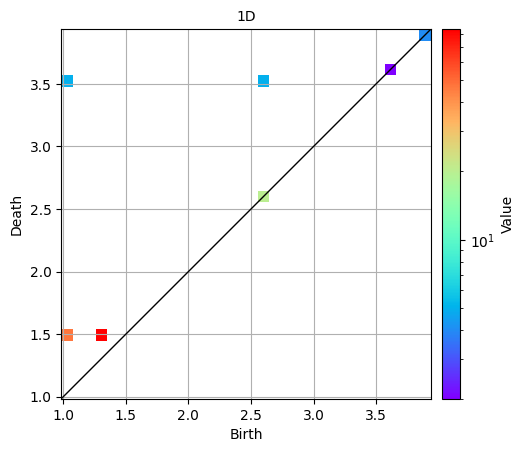

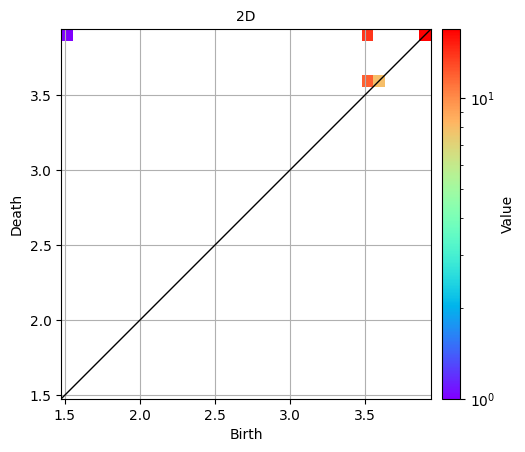

In [160]:
pdlist = hc.PDList("test.pdgm")
pd1 = pdlist.dth_diagram(1)
pd1.histogram(x_bins=32).plot(colorbar={"type": "log"}, title="1D")
pd2 = pdlist.dth_diagram(2)
pd2.histogram(x_bins=32).plot(colorbar={"type": "log"}, title="2D")

In [168]:
pairs = pd1.pairs_in_rectangle(0.5, 1.5, 3.0, 4.0)
print(len(pairs))
print(pairs[0])

5
Pair(0.9845474151700693, 3.5001422121403007)


In [169]:
import random
stable_volumes = [
  pair.stable_volume(1e-3)
  for pair in random.sample(pairs, 2)
]

In [170]:
# ビューアの準備
view = py3Dmol.view()
# ビューアに原子配置の情報を追加
view.addModel(xyz_data, "xyz")
# 原子データの描画の設定をする
view.setStyle({'stick': {"colorscheme": "default"}})
view.addStyle({"sphere": {"scale": 0.3}})
# stable volumeの情報をビューアに追加
for stable_volume in stable_volumes:
    py3dmolhelper.add_edges(view, stable_volume.boundary(), "green", 0.4)

# 以下表示
view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [171]:
triangle = stable_volumes[0].boundary_points()
print(triangle)

[[8.975854920864314e-06, -6.686347649306834e-05, 3.240577808732884], [0.9354635304793862, 2.645932808749277, 1.6202501117465955], [0.9352944359746614, 2.645933671346634, 4.860848977732003], [0.935472554018539, 0.6615887881921946, 1.6202251290863368], [0.9353209667916745, 0.6614023564014408, 4.860701298569183], [1.8708853575195867, 3.3075003128486893, 3.240560056136626]]


In [172]:
import scipy as sp
sp.spatial.distance_matrix(triangle, triangle)

array([[0.        , 3.240656  , 3.24057964, 1.98454607, 1.98422533,
        3.80002356],
       [3.240656  , 0.        , 3.24059887, 1.98434402, 3.79985329,
        1.98446211],
       [3.24057964, 3.24059887, 0.        , 3.79990363, 1.98453132,
        1.98452437],
       [1.98454607, 1.98434402, 3.79990363, 0.        , 3.24047618,
        3.24057559],
       [1.98422533, 3.79985329, 1.98453132, 3.24047618, 0.        ,
        3.24067474],
       [3.80002356, 1.98446211, 1.98452437, 3.24057559, 3.24067474,
        0.        ]])

In [191]:
pairs = pd1.pairs_in_rectangle(0.5, 1.2, 1.0, 2.0)
print(len(pairs))
print(pairs[0])

import random
stable_volumes = [
  pair.stable_volume(1e-3)
  for pair in random.sample(pairs, 2)
]

# ビューアの準備
view = py3Dmol.view()
# ビューアに原子配置の情報を追加
view.addModel(xyz_data, "xyz")
# 原子データの描画の設定をする
view.setStyle({'stick': {"colorscheme": "default"}})
view.addStyle({"sphere": {"scale": 0.3}})
# stable volumeの情報をビューアに追加
for stable_volume in stable_volumes:
    py3dmolhelper.add_edges(view, stable_volume.boundary(), "green", 0.4)

# 以下表示
view.zoomTo()
view.show()

47
Pair(0.9844590560261032, 1.4765568779906229)


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [181]:
pairs = pd1.pairs_in_rectangle(1.3, 2.0, 1.0, 2.0)
print(len(pairs))
print(pairs[0])

import random
stable_volumes = [
  pair.stable_volume(1e-3)
  for pair in random.sample(pairs, 2)
]

# ビューアの準備
view = py3Dmol.view()
# ビューアに原子配置の情報を追加
view.addModel(xyz_data, "xyz")
# 原子データの描画の設定をする
view.setStyle({'stick': {"colorscheme": "default"}})
view.addStyle({"sphere": {"scale": 0.3}})
# stable volumeの情報をビューアに追加
for stable_volume in stable_volumes:
    py3dmolhelper.add_edges(view, stable_volume.boundary(), "green", 0.4)

# 以下表示
view.zoomTo()
view.show()

84
Pair(1.3124333860750026, 1.4764452833239576)


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [190]:
pairs = pd2.pairs_in_rectangle(3.4, 3.6, 3.7, 4.0)
print(len(pairs)) # Print the number of pairs
print(pairs[0]) # Print the birth and death times
# Stable volumes are computed for ten random pairs
stable_volumes = [pair.stable_volume(1e-3) for pair in random.sample(pairs, 3)]
# 3D Visualization

view = py3Dmol.view()
view.addModel(xyz_data, "xyz")
view.setStyle({'stick': {"colorscheme": "default", "opacity": 0.9}}) # 棒の部分を半透明にする
view.addStyle({"sphere": {"scale": 0.3}})
# stable volumeの情報を青色でビューアに追加
for stable_volume in stable_volumes:
    py3dmolhelper.add_surface(view, stable_volume.boundary(), "blue")

# 以下表示
view.zoomTo()
view.show()

14
Pair(3.500242500593303, 3.93740769898419)


3Dmol.js failed to load for some reason. Please check your browser console for error messages.